In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing The Dataset
dataset = pd.read_csv('The_Cancer_data_1500_V2.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[58.          1.         16.08531332 ...  8.14625056  4.14821903
   1.        ]
 [71.          0.         30.82878439 ...  9.36163042  3.51968334
   0.        ]
 [48.          1.         38.78508356 ...  5.13517867  4.72836769
   0.        ]
 ...
 [63.          1.         32.6138607  ...  0.4668482   0.15010113
   0.        ]
 [55.          0.         25.56821592 ...  7.79531682  1.98613765
   1.        ]
 [67.          1.         23.6631042  ...  2.52586007  2.85660008
   1.        ]]


In [4]:
print(y)

[1 0 1 ... 1 1 0]


In [5]:
#Handling Missing Data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 0:8])
x[:, 0:8] = imputer.transform(x[:, 0:8])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [7]:
print(x_train) #Training Set For Independent Variables

[[26.          1.         16.50355857 ...  1.13646039  2.82931537
   0.        ]
 [53.          0.         17.87332493 ...  4.07894237  3.98901186
   1.        ]
 [45.          1.         27.64894769 ...  7.60464606  0.62172659
   0.        ]
 ...
 [30.          1.         16.20465031 ...  9.33593144  2.6809614
   0.        ]
 [22.          0.         30.93003692 ...  7.13607366  0.06505107
   0.        ]
 [46.          1.         16.56724054 ...  4.15913654  4.38744621
   0.        ]]


In [8]:
print(x_test) #Test Set For Independent Variables

[[48.          0.         38.1750242  ...  8.018259    0.11942096
   0.        ]
 [80.          0.         38.94063211 ...  9.99460681  3.45311371
   1.        ]
 [70.          0.         31.66501198 ...  3.03281026  4.22872439
   1.        ]
 ...
 [41.          1.         17.78780531 ...  2.10528488  2.66862707
   0.        ]
 [30.          1.         23.83553448 ...  4.03519992  3.67760353
   1.        ]
 [52.          1.         31.06412999 ...  6.15428915  3.34674175
   0.        ]]


In [9]:
print(y_train) #Training Set For Dependent Variables

[0 1 0 ... 0 0 0]


In [10]:
print(y_test) #Test Set For Dependent Variables

[0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 1]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
#Applying K-NN Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
#Predicting Test Set Results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]

In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[192   9]
 [ 12  87]]


0.93

C:\Users\malek\AppData\Local\Temp\ipykernel_5616\2207628384.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_train_plot[y_train == j, 0], x_train_plot[y_train == j, 1],


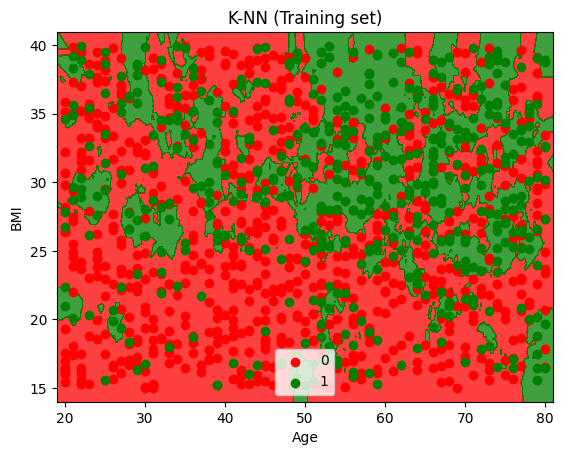

In [15]:
#Visualization of Training Set w/ Age and BMI
from matplotlib.colors import ListedColormap

#Importing The Dataset again to get original values
dataset = pd.read_csv('The_Cancer_data_1500_V2.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Handling Missing Data for the original values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 0:8])
x[:, 0:8] = imputer.transform(x[:, 0:8])

#Splitting the dataset into the Training set and Test set with original values
x_train_orig, x_test_orig, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Selecting the two features (age and BMI) from the original data
x_train_plot = x_train_orig[:, [0, 2]]
x_test_plot = x_test_orig[:, [0, 2]]

#Fitting K-NN to the training set with selected features
classifier_plot = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_plot.fit(x_train_plot, y_train)

#Defining the mesh grid
x1_min, x1_max = x_train_plot[:, 0].min() - 1, x_train_plot[:, 0].max() + 1
x2_min, x2_max = x_train_plot[:, 1].min() - 1, x_train_plot[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05), np.arange(x2_min, x2_max, 0.05))

#Predicting the results on the mesh grid
z = classifier_plot.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

#Plotting the decision boundary
plt.contourf(x1, x2, z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

#Plotting the training points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train_plot[y_train == j, 0], x_train_plot[y_train == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

C:\Users\malek\AppData\Local\Temp\ipykernel_5616\4215668839.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_test_plot[y_test == j, 0], x_test_plot[y_test == j, 1],


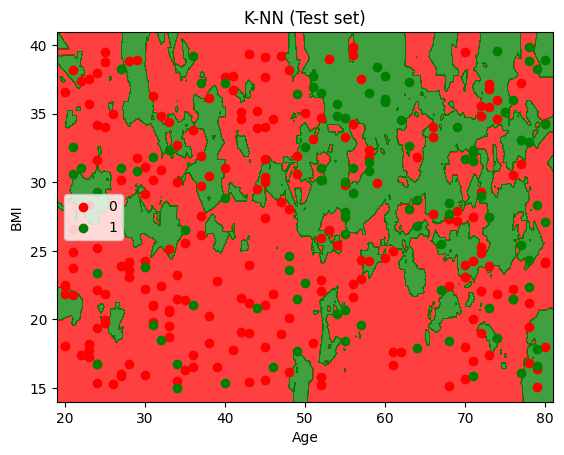

In [16]:
#Visualization of Test Set w/ Age and BMI
from matplotlib.colors import ListedColormap


#Importing The Dataset again to get original values
dataset = pd.read_csv('The_Cancer_data_1500_V2.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Handling Missing Data for the original values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 0:8])
x[:, 0:8] = imputer.transform(x[:, 0:8])

#Splitting the dataset into the Training set and Test set with original values
x_train_orig, x_test_orig, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Selecting the two features (age and BMI) from the original data
x_train_plot = x_train_orig[:, [0, 2]]
x_test_plot = x_test_orig[:, [0, 2]]

#Fitting K-NN to the training set with selected features
classifier_plot = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_plot.fit(x_train_plot, y_train)

#Defining the mesh grid
x1_min, x1_max = x_train_plot[:, 0].min() - 1, x_train_plot[:, 0].max() + 1
x2_min, x2_max = x_train_plot[:, 1].min() - 1, x_train_plot[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05), np.arange(x2_min, x2_max, 0.05))

#Predicting the results on the mesh grid
z = classifier_plot.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

#Plotting the decision boundary
plt.contourf(x1, x2, z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

#Plotting the test points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test_plot[y_test == j, 0], x_test_plot[y_test == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

C:\Users\malek\AppData\Local\Temp\ipykernel_5616\1741833406.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_test_plot[y_test == j, 0], x_test_plot[y_test == j, 1],


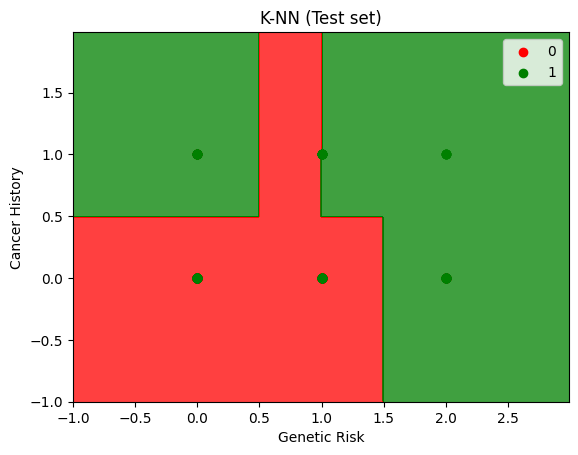

In [17]:
#Visualization of Test Set w/ Genetic Risk and Cancer History
from matplotlib.colors import ListedColormap


#Importing The Dataset again to get original values
dataset = pd.read_csv('The_Cancer_data_1500_V2.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Handling Missing Data for the original values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 0:8])
x[:, 0:8] = imputer.transform(x[:, 0:8])

#Splitting the dataset into the Training set and Test set with original values
x_train_orig, x_test_orig, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Selecting the two features (age and BMI) from the original data
x_train_plot = x_train_orig[:, [4, 7]]
x_test_plot = x_test_orig[:, [4, 7]]

#Fitting K-NN to the training set with selected features
classifier_plot = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_plot.fit(x_train_plot, y_train)

#Defining the mesh grid
x1_min, x1_max = x_train_plot[:, 0].min() - 1, x_train_plot[:, 0].max() + 1
x2_min, x2_max = x_train_plot[:, 1].min() - 1, x_train_plot[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

#Predicting the results on the mesh grid
z = classifier_plot.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

#Plotting the decision boundary
plt.contourf(x1, x2, z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

#Plotting the test points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test_plot[y_test == j, 0], x_test_plot[y_test == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Genetic Risk')
plt.ylabel('Cancer History')
plt.legend()
plt.show()

In [18]:
age = float(input("Enter patient's age: "))
gender = int(input("Enter patient's gender (0 for male, 1 for female): "))
bmi = float(input("Enter patient's BMI: "))
smoking = int(input("Is the patient a smoker? (0 for no, 1 for yes): "))
genetic_risk = int(input("Does the patient have genetic risk? (0 = low, 1 = medium, 2 = high): "))
physical_activity = float(input("Enter patient's physical activity level: "))
alcohol_intake = float(input("Enter patient's alcohol intake level: "))
cancer_history = int(input("Does the patient have a history of cancer? (0 for no, 1 for yes): "))

user_input = [age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history]
user_input_array = np.array(user_input).reshape(1, -1)

#Handling missing data for user input
user_input_array = imputer.transform(user_input_array)

#Feature scaling for user input
user_input_scaled = sc.transform(user_input_array)

#Making prediction
prediction = classifier.predict(user_input_scaled)

if prediction[0] == 1:
    print("The model predicts that the patient is likely to get cancer.")
else:
    print("The model predicts that the patient is not likely to get cancer.")

Enter patient's age:  26
Enter patient's gender (0 for male, 1 for female):  0
Enter patient's BMI:  24.53490
Is the patient a smoker? (0 for no, 1 for yes):  0
Does the patient have genetic risk? (0 = low, 1 = medium, 2 = high):  1
Enter patient's physical activity level:  8.87876
Enter patient's alcohol intake level:  1.434343
Does the patient have a history of cancer? (0 for no, 1 for yes):  0


The model predicts that the patient is not likely to get cancer.
